# Atelier Machine Learning - 2019-01-29 Pole Numerique Brest

# ALLOHa | Advanced Living Lab For Ocean HacksALLoha Brest

# Jean-Marie Prigent 

If you have any comments or modifications to add, please contact me.

## Convolutional Neural Networks

## Project: DB 194 CLASSES Cropped Images (at least 10 images in training set) 

---

### dataset: 
This fish dataset currently consisting of 3,960 images collected from 468 species. This data consists of real-world images of fish captured in conditions defined as "controlled", "out-of-the-water" and "in-situ". The "controlled", images consists of fish specimens, with their fins spread, taken against a constant background with controlled illumination. The "in-situ" images are underwater images of fish in their natural habitat and so there is no control over background or illumination. The "out-of-the-water" images consist of fish specimens, taken out of the water with a varying background and limited control over the illumination conditions. A tight red bounding box is annotated around the fish. 
https://wiki.qut.edu.au/display/cyphy/Fish+Dataset 

![paper prez QUT](imagesJupyter/sc2.png)

Due to inter-session Variability between photos campaigns, it could be tricky to have a standardized/normalized dataset.

example:
![photos fish1](imagesJupyter/sc3a.png)
![photos fish2](imagesJupyter/sc3b.png)
Figure 1: Example images of four different fish species, all which have similar visual appearance despite being distinct species. (Images taken by J.E. Randall)


My main concern in this small project was to check if Deep Learning technics, here CNN, could be use in such hard and small dataset (hard due to heterogenous lighting and photo quality).  

Authors of the paper (see below) 'Local inter-session variability modelling for object classification' have 

This data are used for WACV 2014 paper "Local Inter-Session Variability Modelling for Object Classification".  Baseline classification results can also be found in this paper.

Genuine link from author can be used as follows: [Dropbox](https://www.dropbox.com/s/e2xya1pzr2tm9xr/QUT_fish_data.zip?dl=0)

Please cite this: 

@article{anantharajah2014local,
  title={Local inter-session variability modelling for object classification},
  author={Anantharajah, Kaneswaran and Ge, ZongYuan and McCool, Christopher and Denman, Simon and Fookes, Clinton B and Corke, Peter and Tjondronegoro, Dian W and Sridharan, Sridha},
  year={2014}
}

## IMPORTANT NOTICE from JM Prigent, the presenter: the dataset has been reduce to 194 classes, with at least 10 images sample in training dataset to have a more consistant results.
## Transfer Learning with Fine Tuning isn't a good solution here due to small dataset.


# Paper link: [Paper Dropbox](https://paper.dropbox.com/doc/Atelier-Machine-Learning-ALLOHa--AaLiR8~HgiHCaXGpq~78eTebAQ-x7NyijEbTg8e6exfoxh5z)

### The Road Ahead

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Create a CNN to Classify Fish Breeds (from Scratch)
* [Step 2](#step2): Use a CNN to Classify Fish Breeds (using Transfer Learning)
* [Step 3](#step3): Use a CNN to Classify Fish Breeds (using Transfer Learning with Fine-Tuning)
* [Step 4](#step4): Outro

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Fish Dataset and prepare folders

In [1]:
# PRIOR: install interactivity for IPython (!)
# uncomment choosen method below if next cell fail

## with pip
#pip install ipywidgets
#jupyter nbextension enable --py widgetsnbextension
#!pip install -U -q ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

## or with conda 
#conda install -c conda-forge ipywidgets

In [2]:
# take a look inside image folder
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import Image

fdir = 'fishImages_opt_crop/pre_set experiment with numbers/all_images/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))
    
# tips: you can use navigate with arrow cursor up|down in folder after put mouse and click on image name (*.png)

interactive(children=(Dropdown(description='file', options=('84.png', '945.png', '1349.png', '4237.png', '4259…

In [3]:
# How to visualize Folders and Files - explore species proximity on thalassoma_*
#   navigate with arrow cursor up|down

import os
import ipywidgets as widgets

# Create widgets
rawPath = 'fishImages_opt_crop/raw_crop_opt_reduce/'
directory = widgets.Dropdown(options=[rawPath + 'thalassoma_trilobatum',
                                      rawPath + 'thalassoma_quinquevittatum',
                                      rawPath + 'thalassoma_purpureum',
                                      rawPath + 'thalassoma_hardwicke'])
images = widgets.Dropdown(options=os.listdir(directory.value))


# Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(directory.value)

# Tie the image options to directory value
directory.observe(update_images, 'value')

# Show the images
def show_images(fdir, file):
   display(Image(f'{fdir}/{file}'))


_ = interact(show_images, fdir=directory, file=images)

interactive(children=(Dropdown(description='fdir', options=('fishImages_opt_crop/raw_crop_opt_reduce/thalassom…

In [4]:
import tensorflow as tf
print('tensorflow', tf.__version__)

tensorflow 1.12.0


In [5]:
# notes: it's higly recommended to use tensorflow only with embded tf.keras 

In [6]:
# Some info on GPU
#!nvidia-smi

In [7]:
### Below how I create the folder for training, validating and test.

- `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `fish_names` - list of string-valued fish species names

In [8]:
from sklearn.datasets import load_files
from keras import utils

#from tf.keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets

def load_dataset(path):
    data = load_files(path)
    fish_files = np.array(data['filenames'])
    fish_targets = utils.to_categorical(np.array(data['target']), 194)
    return fish_files, fish_targets


# load train, test, and validation datasets
train_files, train_targets = load_dataset('fishImages_opt_crop/train')
valid_files, valid_targets = load_dataset('fishImages_opt_crop/val')
test_files, test_targets = load_dataset('fishImages_opt_crop/test')

# load list of fish names
fish_names = [item[26:-1]
              for item in sorted(glob("fishImages_opt_crop/train/*/"))]

# print statistics about the dataset
print('There are %d total fish categories.' % len(fish_names))
print('There are %s total fish images.\n' %
      len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training fish images.' % len(train_files))
print('There are %d validation fish images.' % len(valid_files))
print('There are %d test fish images.' % len(test_files))

Using TensorFlow backend.


There are 194 total fish categories.
There are 2755 total fish images.

There are 2122 training fish images.
There are 421 validation fish images.
There are 212 test fish images.


In [9]:
print('fish species list', fish_names)

fish species list ['P1ROZCtZ', 'acanthistius_cinctus', 'acanthopagrus_berda', 'aethaloperca_rogaa', 'aluterus_monoceros', 'aluterus_scriptus', 'amanses_scopas', 'anampses_caeruleopunctatus', 'anampses_meleagrides', 'anampses_twistii', 'anyperodon_leucogrammicus', 'aphareus_furca', 'aphareus_rutilans', 'argyrops_spinifer', 'bodianus_anthioides', 'bodianus_axillaris', 'bodianus_bilunulatus', 'bodianus_bimaculatus', 'bodianus_diana', 'bodianus_loxozonus', 'bodianus_mesothorax', 'bothus_mancus', 'bothus_pantherinus', 'cantherhines_dumerilii', 'cantherhines_fronticinctus', 'cantherhines_pardalis', 'carangoides_caeruleopinnatus', 'carangoides_fulvoguttatus', 'carangoides_orthogrammus', 'caranx_ignobilis', 'caranx_melampygus', 'caranx_sexfasciatus', 'carcharhinus_amblyrhynchos', 'carcharhinus_limbatus', 'carcharhinus_melanopterus', 'cephalopholis_argus', 'cephalopholis_boenak', 'cephalopholis_cyanostigma', 'cephalopholis_leopardus', 'cephalopholis_miniata', 'cephalopholis_sexmaculata', 'cepha

## Pre-process the Data

In [10]:
from keras.preprocessing import image
from tqdm import tqdm_notebook


def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)


def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path)
                       for img_path in tqdm_notebook(img_paths)]
    # return 4D tensor with shape (nb_samples*, 224, 224, 3) *number of img in the supplied array of image pathS
    return np.vstack(list_of_tensors)

### Rescale the images

Rescale the images by dividing every pixel in every image by 255.

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

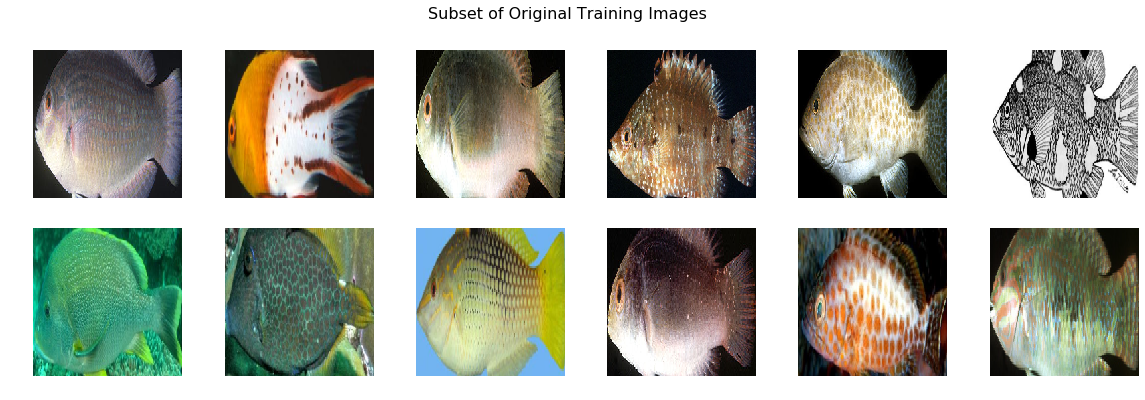

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# take subset of training dataset
train_tensors_subset = train_tensors[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20, 6))
for i in range(0, len(train_tensors_subset)):
    ax = fig.add_subplot(2, 6, i+1)
    plt.axis('off')
    ax.imshow(train_tensors_subset[i])
    fig.suptitle('Subset of Original Training Images', fontsize=16)
plt.show()

---
<a id='step1'></a>
## Step 1: Create a CNN to Classify Fish Species (from Scratch)

I need to mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 480 times, which corresponds to an accuracy of less than 0.2%.

In [13]:
import warnings
warnings.filterwarnings('ignore')

from keras.initializers import RandomUniform
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization, GaussianNoise
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
# clear active graph session
# K.clear_session()

# checks some shape
print(train_tensors.shape[1:], train_targets.shape[1:],
      valid_tensors.shape[1:], valid_targets.shape[1:])


model = Sequential()

# all my test has been done with tensorboard monitoring to check :
#  - speed of improvement accuracy
#  - regularity of improvement (fast at the begining, slow at the end : looking for a boomerang figure)
#  - overfiting (cf plotting next cells)
#  - impact of data augmentation parameters

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', name='conv_1',
                 input_shape=train_tensors.shape[1:]))
model.add(BatchNormalization(name='batchNormalization_1'))

model.add(Conv2D(filters=32, kernel_size=3,
                 activation='relu', padding='same', name='conv_1b'))
model.add(MaxPooling2D(pool_size=2, name='maxPool_1b'))
#model.add(Dropout(0.15, name='dropout_1b'))
model.add(BatchNormalization(name='batchNormalization_1b'))

model.add(Conv2D(filters=64, kernel_size=3,
                 activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D(pool_size=2, name='maxPool_2'))
model.add(Dropout(0.15, name='dropout_2'))
# model.add(BatchNormalization(name='batchNormalization_2'))

model.add(GaussianNoise(0.15, name='noise_1'))

model.add(Conv2D(filters=64, kernel_size=3,
                 activation='relu', padding='same', name='conv_2b'))
model.add(MaxPooling2D(pool_size=2, name='maxPool_2b'))
#model.add(Dropout(0.15, name='dropout_2b'))
model.add(BatchNormalization(name='batchNormalization_2b'))

model.add(Conv2D(filters=128, kernel_size=3,
                 activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D(pool_size=2, name='maxPool_3'))
#model.add(Dropout(0.15, name='dropout_3'))
model.add(BatchNormalization(name='batchNormalization_3'))

model.add(GaussianNoise(0.15, name='noise_3'))

model.add(Conv2D(filters=256, kernel_size=3,
                 activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D(pool_size=2, name='maxPool_4'))

#model.add(Dropout(0.15, name='dropout_4'))

model.add(BatchNormalization(name='batchNormalization_4'))

model.add(GlobalAveragePooling2D(name='globAvgPool_5'))
# model.add(Dropout(0.25, name='dropout_5'))   # dft 0.4
model.add(BatchNormalization(name='batchNormalization_5'))

model.add(Dropout(0.40, name='dropout_6'))   # dft 0.4 , last 0.15

model.add(Dense(194, activation='softmax', name='dense_final',
                kernel_initializer=RandomUniform(minval=-0.022, maxval=0.022),
                # kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.l2(0.077),  #  0.075
                activity_regularizer=regularizers.l2(0.02)
                ))    # elasticnet l1_l2,

model.summary()

(224, 224, 3) (194,) (224, 224, 3) (194,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
batchNormalization_1 (BatchN (None, 224, 224, 16)      64        
_________________________________________________________________
conv_1b (Conv2D)             (None, 224, 224, 32)      4640      
_________________________________________________________________
maxPool_1b (MaxPooling2D)    (None, 112, 112, 32)      0         
_________________________________________________________________
batchNormalization_1b (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
conv_2 (Conv2D)              (None, 112, 112, 64)      18496     
_________________________________________________________________
maxPool_2 (MaxPooling2D)     (None

## Train the Scratch Model

In [14]:
# launch this cell for reloading model from disk

import os
import time
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

# job and Tensorboard hyperparameter setup
epochs = 250
batch_size = 32
lr = 0.01 # default 0.01
data_augmentation = True
dataAugm = str(data_augmentation)
splitInit = '_80_10_10'     # _80_10_10, _65_15_15
batchNorm = 'True'
stepDecay = 'stdCallbacks'

# optimizers tests
# optim=Adam(lr=0.01, amsgrad=True)    # From the convergence of Adam and beyond ICLR 2018 http://www.satyenkale.com/papers/amsgrad.pdf
optim = RMSprop(lr=lr)  # default lr=1e-3
#optim=Adadelta(lr=1.0, rho=0.95, epsilon=1e-6)
#optim=Adagrad(lr=0.01, epsilon=1e-6)
#optim=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

optimSt = 'RMSprop'
amsgrad = 'False'

In [15]:
#import warnings
#warnings.filterwarnings('ignore')

# ------------------------------------------------------------------------------------------------------
# compile the model from scratch
model.compile(optimizer=optim, loss='categorical_crossentropy',
              metrics=['accuracy'])
# ------------------------------------------------------------------------------------------------------
# Writer tensorboard
jobName = 'fish_scratch_Cropped_GaussianNoiseAdded015_{}_btchSz{}_nEpch{}_lr{}_optim{}_amsgrad{}_dataAugm{}_batchNorm{}_splitInit{}_stepDecay{}'.format(
    time.strftime("%Y%m%d_%H%M%S"), batch_size, epochs, lr, optimSt, amsgrad, dataAugm, batchNorm, splitInit, stepDecay)

tensorboard_fp = os.path.join('runs', jobName)
# ------------------------------------------------------------------------------------------------------
print('launch tensorboard --logdir runs={0}` to visualize results on tensorboard \n'
      .format(tensorboard_fp))
# ---------------------------------------------------------------------------------------------------------------
# callbacks
# add ModelCheckpoint callback to record best weight only
checkpointer = ModelCheckpoint(monitor='val_loss', filepath='saved_models/weights_best_from_'+jobName+'.hdf5',
                               verbose=1, save_best_only=True)

# add tensorboard callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_fp)

# add Earlystop callback
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=50,
                              verbose=1, mode='auto', restore_best_weights=True)

# add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=20, verbose=1)

# ---------------------------------------------------------------------------------------------------------------
# data augmentation

if not data_augmentation:
    print('Not using data augmentation')

    history_NDA = model.fit(train_tensors,
                            train_targets,
                            validation_data=(valid_tensors, valid_targets),
                            epochs=epochs,
                            batch_size=batch_size,
                            callbacks=[checkpointer, tb_callback,
                                       earlystopping, reduce_lr],  # lrate
                            verbose=1
                            )

else:
    from keras.preprocessing.image import ImageDataGenerator
    print('Using real-time data augmentation')

    # This will do realtime data augmentation:   cd https://keras.io/preprocessing/image/

    datagen_train = ImageDataGenerator(
        # featurewise_center=True,               # set input mean to 0 over the dataset
        # samplewise_center=False,               # set each sample mean to 0
        # featurewise_std_normalization=True,    # divide inputs by std of the dataset
        # samplewise_std_normalization=False,    # divide each input by its std
        # zca_epsilon                            # epsilon for ZCA whitening. Default is 1e-6.
        # zca_whitening=False,                   # apply ZCA whitening
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=20,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.2,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.2,
        zoom_range=0.2,                          # Range for random zoom
        # shear_range=0.1,                       # Shear Intensity (Shear angle in CCW direction as radians)
        # horizontal_flip=True,   < HERE FISH ALWAYS LOOK LEFT IN DATASET > # randomly flip images
        # vertical_flip=False,                   # randomly flip images
        # Points outside the boundaries of the input are filled according
        fill_mode='nearest'
    )

    datagen_train.fit(train_tensors)

    # Fit the model on the batches generated by datagen.flow().
    
    history_DA = model.fit_generator(
        datagen_train.flow(train_tensors, train_targets,
                           batch_size=batch_size),
        steps_per_epoch=train_tensors.shape[0] // batch_size,
        epochs=epochs,
        callbacks=[checkpointer, tb_callback,
                   earlystopping, reduce_lr],
        validation_data=(valid_tensors, valid_targets),
        validation_steps=valid_tensors.shape[0] // batch_size,
        use_multiprocessing=False, # False,
        workers=1,
    )


launch tensorboard --logdir runs=runs/fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecaystdCallbacks` to visualize results on tensorboard 

Using real-time data augmentation
Epoch 1/250
66/66 [==============================] - 21s 320ms/step - loss: 6.2503 - acc: 0.0118 - val_loss: 8.2292 - val_acc: 0.0119

Epoch 00001: val_loss improved from inf to 8.22916, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecaystdCallbacks.hdf5
Epoch 2/250
66/66 [==============================] - 20s 300ms/step - loss: 5.7460 - acc: 0.0109 - val_loss: 6.1472 - val_acc: 0.0143

Epoch 00002: val_loss improved from 8.22916 to 6.14719, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_2256

66/66 [==============================] - 20s 302ms/step - loss: 5.2550 - acc: 0.0679 - val_loss: 5.2001 - val_acc: 0.0784

Epoch 00031: val_loss improved from 5.20155 to 5.20015, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecaystdCallbacks.hdf5
Epoch 32/250
66/66 [==============================] - 20s 301ms/step - loss: 5.2726 - acc: 0.0540 - val_loss: 5.2457 - val_acc: 0.0641

Epoch 00032: val_loss did not improve from 5.20015
Epoch 33/250
66/66 [==============================] - 20s 300ms/step - loss: 5.2419 - acc: 0.0635 - val_loss: 5.0477 - val_acc: 0.0974

Epoch 00033: val_loss improved from 5.20015 to 5.04772, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecay


Epoch 00063: val_loss did not improve from 4.89160
Epoch 64/250
66/66 [==============================] - 20s 301ms/step - loss: 4.9993 - acc: 0.1094 - val_loss: 4.9691 - val_acc: 0.1116

Epoch 00064: val_loss did not improve from 4.89160
Epoch 65/250
66/66 [==============================] - 20s 303ms/step - loss: 5.0049 - acc: 0.1052 - val_loss: 5.0821 - val_acc: 0.1116

Epoch 00065: val_loss did not improve from 4.89160
Epoch 66/250
66/66 [==============================] - 20s 300ms/step - loss: 4.9677 - acc: 0.1242 - val_loss: 4.9524 - val_acc: 0.0831

Epoch 00066: val_loss did not improve from 4.89160
Epoch 67/250
66/66 [==============================] - 20s 302ms/step - loss: 4.9850 - acc: 0.1140 - val_loss: 4.9427 - val_acc: 0.0974

Epoch 00067: val_loss did not improve from 4.89160
Epoch 68/250
66/66 [==============================] - 20s 304ms/step - loss: 4.9912 - acc: 0.1108 - val_loss: 4.9429 - val_acc: 0.1401

Epoch 00068: val_loss did not improve from 4.89160
Epoch 69/250


66/66 [==============================] - 20s 300ms/step - loss: 4.8584 - acc: 0.1426 - val_loss: 4.8053 - val_acc: 0.1520

Epoch 00099: val_loss did not improve from 4.64361
Epoch 100/250
66/66 [==============================] - 20s 302ms/step - loss: 4.8020 - acc: 0.1561 - val_loss: 4.7694 - val_acc: 0.1686

Epoch 00100: val_loss did not improve from 4.64361
Epoch 101/250
66/66 [==============================] - 20s 303ms/step - loss: 4.7863 - acc: 0.1597 - val_loss: 4.8829 - val_acc: 0.1853

Epoch 00101: val_loss did not improve from 4.64361
Epoch 102/250
66/66 [==============================] - 20s 299ms/step - loss: 4.8575 - acc: 0.1473 - val_loss: 4.8405 - val_acc: 0.1615

Epoch 00102: val_loss did not improve from 4.64361
Epoch 103/250
66/66 [==============================] - 20s 305ms/step - loss: 4.8028 - acc: 0.1610 - val_loss: 4.8157 - val_acc: 0.1805

Epoch 00103: val_loss did not improve from 4.64361
Epoch 104/250
66/66 [==============================] - 20s 302ms/step - lo

66/66 [==============================] - 20s 300ms/step - loss: 4.6318 - acc: 0.1981 - val_loss: 4.5234 - val_acc: 0.2423

Epoch 00138: val_loss did not improve from 4.45137
Epoch 139/250
66/66 [==============================] - 20s 302ms/step - loss: 4.5699 - acc: 0.2113 - val_loss: 4.4456 - val_acc: 0.2470

Epoch 00139: val_loss improved from 4.45137 to 4.44560, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecaystdCallbacks.hdf5
Epoch 140/250
66/66 [==============================] - 20s 301ms/step - loss: 4.6180 - acc: 0.2066 - val_loss: 4.8773 - val_acc: 0.1710

Epoch 00140: val_loss did not improve from 4.44560
Epoch 141/250
66/66 [==============================] - 20s 302ms/step - loss: 4.6559 - acc: 0.1952 - val_loss: 4.6183 - val_acc: 0.2067

Epoch 00141: val_loss did not improve from 4.44560
Epoch 142/250
66/66 [======


Epoch 00176: val_loss did not improve from 4.31516
Epoch 177/250
66/66 [==============================] - 20s 300ms/step - loss: 4.4167 - acc: 0.2582 - val_loss: 4.5833 - val_acc: 0.2447

Epoch 00177: val_loss did not improve from 4.31516
Epoch 178/250
66/66 [==============================] - 20s 300ms/step - loss: 4.4466 - acc: 0.2336 - val_loss: 4.5126 - val_acc: 0.2637

Epoch 00178: val_loss did not improve from 4.31516
Epoch 179/250
66/66 [==============================] - 20s 300ms/step - loss: 4.4915 - acc: 0.2343 - val_loss: 4.7133 - val_acc: 0.2375

Epoch 00179: val_loss did not improve from 4.31516
Epoch 180/250
66/66 [==============================] - 20s 300ms/step - loss: 4.4589 - acc: 0.2340 - val_loss: 4.5912 - val_acc: 0.2613

Epoch 00180: val_loss did not improve from 4.31516
Epoch 181/250
66/66 [==============================] - 20s 301ms/step - loss: 4.4153 - acc: 0.2519 - val_loss: 4.7016 - val_acc: 0.2565

Epoch 00181: val_loss did not improve from 4.31516
Epoch 18


Epoch 00213: val_loss did not improve from 3.46569
Epoch 214/250
66/66 [==============================] - 20s 300ms/step - loss: 3.4704 - acc: 0.3746 - val_loss: 3.5885 - val_acc: 0.4062

Epoch 00214: val_loss did not improve from 3.46569
Epoch 215/250
66/66 [==============================] - 20s 301ms/step - loss: 3.4933 - acc: 0.3639 - val_loss: 3.5208 - val_acc: 0.4109

Epoch 00215: val_loss did not improve from 3.46569
Epoch 216/250
66/66 [==============================] - 20s 301ms/step - loss: 3.4775 - acc: 0.3614 - val_loss: 3.4515 - val_acc: 0.4252

Epoch 00216: val_loss improved from 3.46569 to 3.45148, saving model to saved_models/weights_best_from_fish_scratch_Cropped_GaussianNoiseAdded015_20190701_225625_btchSz32_nEpch250_lr0.01_optimRMSprop_amsgradFalse_dataAugmTrue_batchNormTrue_splitInit_80_10_10_stepDecaystdCallbacks.hdf5
Epoch 217/250
66/66 [==============================] - 20s 300ms/step - loss: 3.4731 - acc: 0.3701 - val_loss: 3.4822 - val_acc: 0.4181

Epoch 00217:

## Visualize some augmented data

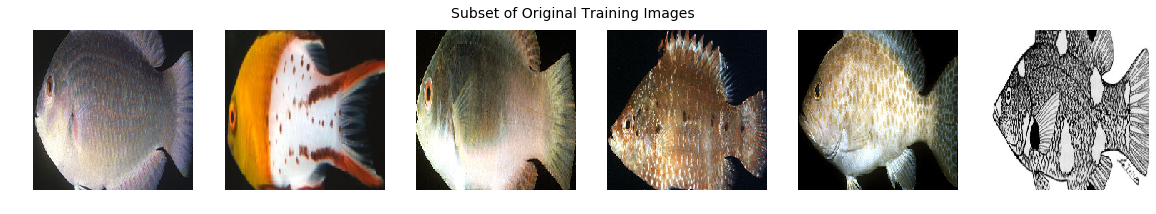

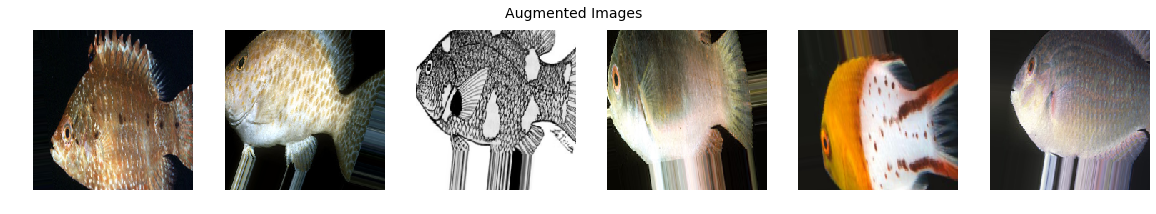

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# take subset of training dataset
train_tensors_subset = train_tensors[:6]

# visualize subset of training data
fig = plt.figure(figsize=(20, 3))
for i in range(0, len(train_tensors_subset)):
    ax = fig.add_subplot(1, 6, i+1)
    plt.axis('off')
    ax.imshow(train_tensors_subset[i])
    fig.suptitle('Subset of Original Training Images', fontsize=14)
plt.show()

# visualize augmented images if activated
if data_augmentation:
    fig = plt.figure(figsize=(20, 3))
    for x_batch in datagen_train.flow(train_tensors_subset, batch_size=8):
        for i in range(0, 6):
            ax = fig.add_subplot(1, 6, i+1)
            plt.axis('off')
            ax.imshow(x_batch[i])
        fig.suptitle('Augmented Images', fontsize=14)
        plt.show()
        break

##  Visualize training history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


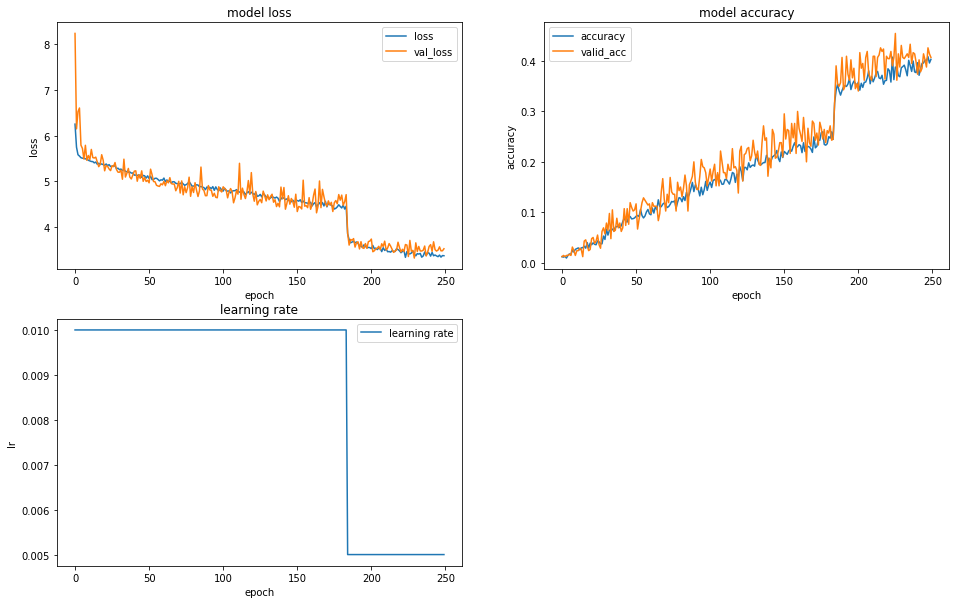

In [17]:
import matplotlib.pyplot as plt
if data_augmentation:
    history = history_DA     # load history with data augmentation
else:
    history = history_NDA    # load history without data augmentation

%matplotlib inline

# list all data in history
print(history.history.keys())

# close pre existing matplotlib visu
plt.close('all')

# summarize history for accuracy
plt.figure(figsize=(16, 10))

# summarize history for loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.title('model loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='valid_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title('model accuracy')

plt.subplot(2, 2, 3)
plt.plot(history.history['lr'], label='learning rate')
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend()
plt.savefig('model_scratch__epochs_' + str(epochs) +
            '__batch_size_' + str(batch_size) + '.png')
# plt.subplots_adjust(wspace=0.50)
plt.show()

## Another way to show training history

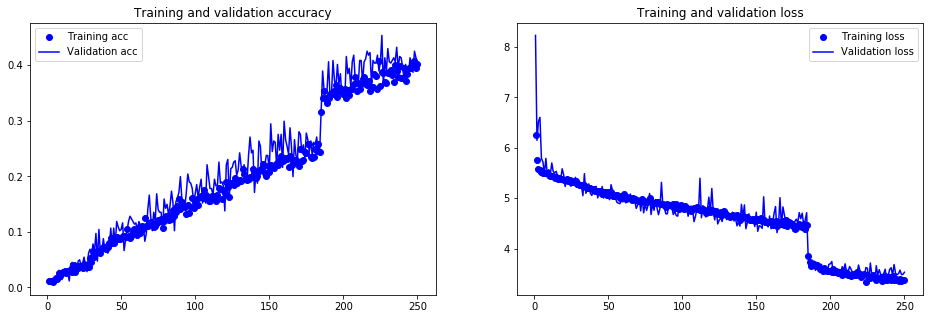

In [18]:
import matplotlib.pyplot as plt

if data_augmentation:
    history = history_DA     # load history with data augmentation
else:
    history = history_NDA    # load history without data augmentation

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test the Model

In [19]:
# evaluate test accuracy on model
fish_species_predictions = model.evaluate(
    test_tensors, test_targets, verbose=0)
accuracyS = 100*fish_species_predictions[1]

# print test accuracy
print('Test accuracy for Scratch Learning: %.2f%%' % accuracyS)

Test accuracy for Scratch Learning: 38.21%


### Compute the rank-1, rank-5 and rank-10 accuracy
(I find rank-10 accuracy a non senses for low number classes (here we have only 194 classes) but because author of paper does it, I did the same to have comparison)

In [20]:
from utils.ranked import rank5_accuracy

print("calculate predictions on test features for Scratch learning model:")
preds = model.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(preds, test_targets.argmax(axis=1))

# display the rank-1, rank-5 and rank-10 accuracies
print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

calculate predictions on test features for Scratch learning model:
rank-1: 38.21%
rank-5: 63.68%
rank-10: 71.23%


In [21]:
from utils.fishdetector import *
%load_ext autoreload
%autoreload 2

'''
specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

model:           model to load 
image_to_test:   local filepath to the image to test
fish_names:      fish_names python list

'''

'\nspecie_identification(model, image_to_test, fish_names)\nmultiples_species_identification(model, image_to_test, fish_names)\n\nmodel:           model to load \nimage_to_test:   local filepath to the image to test\nfish_names:      fish_names python list\n\n'

fish unique-species detector give: ('aluterus_scriptus', '38.04%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'carangoides_fulvoguttatus', 'aluterus_monoceros']
1: [38.043762   9.863002   3.1765838]


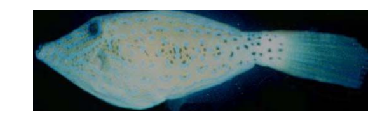

In [22]:
image_to_test = 'aluterus_scriptus_7.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('oxymonacanthus_longirostris', '99.94%') 

fish multi-species detector give:
0: ['oxymonacanthus_longirostris', 'thalassoma_trilobatum', 'halichoeres_chloropterus']
1: [9.9941727e+01 1.9918839e-02 1.6650608e-02]


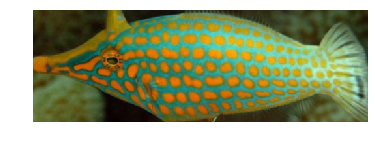

In [23]:
image_to_test = 'oxymonacanthus_longirostris_5.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

[aluterus scriptus sample 1 from google](https://www.google.com/imgres?imgurl=http%3A%2F%2Fwww.ryanphotographic.com%2Fimages%2FJPEGS%2FAluterus%2520scriptus%2520Scrawled%2520filefish%2C%2520Fiji.jpg&imgrefurl=http%3A%2F%2Fwww.ryanphotographic.com%2Fmonacanthidae.htm&docid=TdVoCxU2AegwAM&tbnid=fMeyh8ZXMYs4nM%3A&vet=10ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhKKAkwCQ..i&w=1000&h=626&bih=953&biw=1855&q=aluterus_scriptus&ved=0ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhKKAkwCQ&iact=mrc&uact=8)


fish unique-species detector give: ('halichoeres_chloropterus', '13.70%') 

fish multi-species detector give:
0: ['halichoeres_chloropterus', 'halichoeres_marginatus', 'bothus_pantherinus']
1: [13.696546   3.3643823  3.3030353]


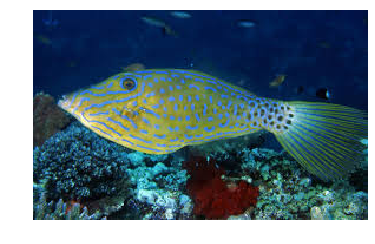

In [24]:
# FROM GOOGLE IMAGE
image_to_test = 'aluterus_scriptus_downloadGoogleImage.jpeg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

[aluterus scriptus sample 2 from google](https://www.google.com/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F2%2F2a%2F%25D0%2590%25D0%25BB%25D1%2583%25D1%2582%25D0%25B5%25D1%2580_%25D1%2580%25D0%25B0%25D1%2581%25D0%25BF%25D0%25B8%25D1%2581%25D0%25BD%25D0%25BE%25D0%25B9.Scribbled_leatherjacket_filefish_%2528Aluterus_scriptus%2529..DSCF1085OB.jpg&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3A%25D0%2590%25D0%25BB%25D1%2583%25D1%2582%25D0%25B5%25D1%2580_%25D1%2580%25D0%25B0%25D1%2581%25D0%25BF%25D0%25B8%25D1%2581%25D0%25BD%25D0%25BE%25D0%25B9.Scribbled_leatherjacket_filefish_(Aluterus_scriptus)..DSCF1085OB.jpg&docid=j3Tl2bJjM2fqqM&tbnid=oIGJO28KD6RIFM%3A&vet=10ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhTKBIwEg..i&w=3356&h=2154&bih=953&biw=1855&q=aluterus_scriptus&ved=0ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhTKBIwEg&iact=mrc&uact=8)


fish unique-species detector give: ('macolor_niger', '14.50%') 

fish multi-species detector give:
0: ['macolor_niger', 'bothus_pantherinus', 'epinephelus_polyphekadion']
1: [14.502171 11.452015  5.622386]


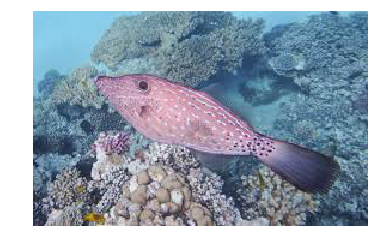

In [25]:
# FROM GOOGLE IMAGE
# https://www.google.com/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F2%2F2a%2F%25D0%2590%25D0%25BB%25D1%2583%25D1%2582%25D0%25B5%25D1%2580_%25D1%2580%25D0%25B0%25D1%2581%25D0%25BF%25D0%25B8%25D1%2581%25D0%25BD%25D0%25BE%25D0%25B9.Scribbled_leatherjacket_filefish_%2528Aluterus_scriptus%2529..DSCF1085OB.jpg&imgrefurl=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3A%25D0%2590%25D0%25BB%25D1%2583%25D1%2582%25D0%25B5%25D1%2580_%25D1%2580%25D0%25B0%25D1%2581%25D0%25BF%25D0%25B8%25D1%2581%25D0%25BD%25D0%25BE%25D0%25B9.Scribbled_leatherjacket_filefish_(Aluterus_scriptus)..DSCF1085OB.jpg&docid=j3Tl2bJjM2fqqM&tbnid=oIGJO28KD6RIFM%3A&vet=10ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhTKBIwEg..i&w=3356&h=2154&bih=953&biw=1855&q=aluterus_scriptus&ved=0ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhTKBIwEg&iact=mrc&uact=8

image_to_test = 'aluterus_scriptus_downloadGoogleImage2.jpeg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('epinephelus_coioides', '5.97%') 

fish multi-species detector give:
0: ['epinephelus_coioides', 'epibulus_insidiator', 'epinephelus_areolatus']
1: [5.9674087 3.9721153 3.9068565]


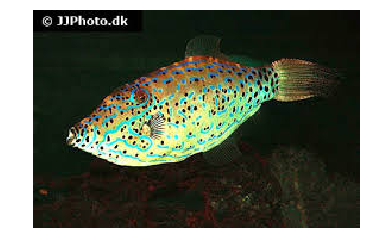

In [26]:
# FROM GOOGLE IMAGE https://www.google.com/imgres?imgurl=https%3A%2F%2Freefapp.net%2Flex%2Fimage%2Flarge%2F1373.jpg&imgrefurl=https%3A%2F%

image_to_test = 'aluterus_scriptus_downloadGoogleImage3.jpeg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('pristipomoides_filamentosus', '7.82%') 

fish multi-species detector give:
0: ['pristipomoides_filamentosus', 'sillago_sihama', 'stethojulis_interrupta']
1: [7.8209457 5.685745  5.181197 ]


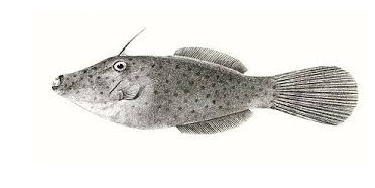

In [27]:
# FROM GOOGLE IMAGE https://www.google.com/imgres?imgurl=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fa%2Fa2%2FAnacanthus_scriptus_Achilles_176.jpg%2F440px-Anacanthus_scriptus_Achilles_176.jpg&imgrefurl=http%3A%2F%2Fwww.wikiwand.com%2Fen%2FAluterus_scriptus&docid=I5jukqlxSZ4s5M&tbnid=xc6xmPHWe4v_CM%3A&vet=10ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhtKB4wHg..i&w=440&h=201&bih=953&biw=1855&q=aluterus_scriptus&ved=0ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhtKB4wHg&iact=mrc&uact=8

image_to_test = 'aluterus_scriptus_downloadGoogleImage4.jpeg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

---

fish unique-species detector give: ('thalassoma_trilobatum', '60.96%') 

fish multi-species detector give:
0: ['thalassoma_trilobatum', 'thalassoma_purpureum', 'cheilio_inermis']
1: [60.96118    4.6780868  3.2950115]


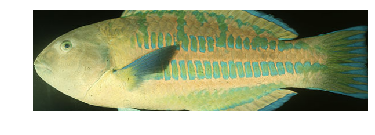

In [28]:
image_to_test = 'thalassoma_trilobatum_4.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('ophthalmolepis_lineolatus', '16.86%') 

fish multi-species detector give:
0: ['ophthalmolepis_lineolatus', 'cirrhilabrus_exquisitus', 'thalassoma_quinquevittatum']
1: [16.86134  13.779184 10.538855]


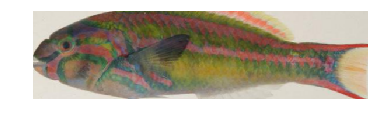

In [29]:
image_to_test = 'thalassoma_quinquevittatum_8.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_quinquevittatum', '5.44%') 

fish multi-species detector give:
0: ['thalassoma_quinquevittatum', 'thalassoma_purpureum', 'oxycheilinus_bimaculatus']
1: [5.436555  4.1676598 3.4733598]


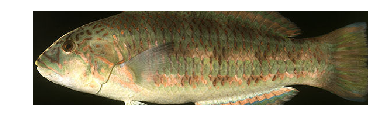

In [30]:
image_to_test = 'thalassoma_purpureum_6.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_hardwicke', '36.17%') 

fish multi-species detector give:
0: ['thalassoma_hardwicke', 'thalassoma_jansenii', 'stethojulis_interrupta']
1: [36.172337 10.082128  5.06832 ]


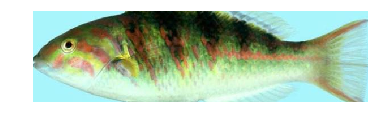

In [31]:
image_to_test = 'thalassoma_hardwicke_2.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

---

fish unique-species detector give: ('elagatis_bipinnulata', '36.21%') 

fish multi-species detector give:
0: ['elagatis_bipinnulata', 'aphareus_furca', 'sphyraena_obtusata']
1: [36.207653   9.270131   3.8477912]


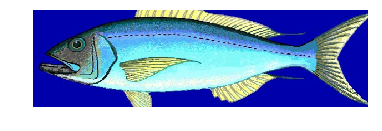

In [32]:
image_to_test = 'aphareus_furca_19.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('bothus_pantherinus', '39.10%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'macolor_niger', 'epinephelus_polyphekadion']
1: [39.096348   3.9859567  2.775232 ]


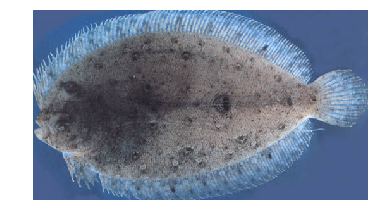

In [33]:
image_to_test = 'bothus_pantherinus_6.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('variola_albimarginata', '92.12%') 

fish multi-species detector give:
0: ['variola_albimarginata', 'variola_louti', 'plectropomus_leopardus']
1: [92.1226      1.5139799   0.52788115]


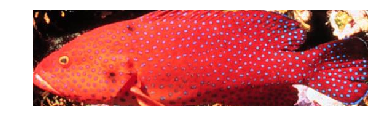

In [34]:
image_to_test = 'cephalopholis_miniata_7.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('epinephelus_areolatus', '6.18%') 

fish multi-species detector give:
0: ['epinephelus_areolatus', 'halichoeres_marginatus', 'epinephelus_fuscoguttatus']
1: [6.175478  5.6570473 4.3728557]


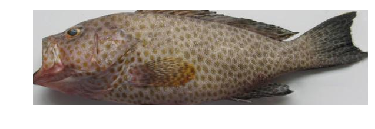

In [35]:
image_to_test = 'epinephelus_areolatus_6.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

fish unique-species detector give: ('pseudanthias_ventralis', '18.50%') 

fish multi-species detector give:
0: ['pseudanthias_ventralis', 'pseudanthias_bicolor', 'pseudanthias_hypselosoma']
1: [18.496199 16.301464 12.14093 ]


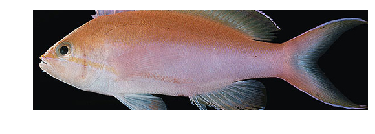

In [36]:
image_to_test = 'pseudanthias_bicolor_3.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)

In [37]:
from sklearn.metrics import classification_report

predictions = model.predict(test_tensors, batch_size=32)
print(classification_report(test_targets.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=fish_names))

                               precision    recall  f1-score   support

                     P1ROZCtZ       0.00      0.00      0.00         1
         acanthistius_cinctus       1.00      1.00      1.00         1
          acanthopagrus_berda       0.00      0.00      0.00         1
           aethaloperca_rogaa       0.00      0.00      0.00         1
           aluterus_monoceros       0.00      0.00      0.00         1
            aluterus_scriptus       0.50      1.00      0.67         1
               amanses_scopas       0.33      1.00      0.50         1
   anampses_caeruleopunctatus       1.00      1.00      1.00         1
         anampses_meleagrides       1.00      1.00      1.00         1
             anampses_twistii       0.20      1.00      0.33         1
    anyperodon_leucogrammicus       0.00      0.00      0.00         1
               aphareus_furca       0.00      0.00      0.00         1
            aphareus_rutilans       1.00      1.00      1.00         1
     

---
<a id='step2'></a>
## Step 2: TRANSFER LEARNING FROM VGG16

In [38]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, input_shape=(224, 224, 3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
from keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization, GaussianNoise
from keras.models import Sequential
from keras import regularizers
from keras.initializers import RandomUniform
from keras.layers import LeakyReLU

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
#  , model2.add(layers.Dense(256, activation='relu'))  # default: relu
model2.add(layers.Dense(256))
# impressive change in loss rate here (!)RECOMMENDED FOR ACCOUSTIC MODEL-> Dorian
model2.add(LeakyReLU())
model2.add(Dropout(0.50))
model2.add(layers.Dense(194, activation='softmax', name='m2_dense_final',
                        kernel_regularizer=regularizers.l2(
                            0.05),  #  0.01, last 0.025
                        # 0.001, last 0.0025   # elasticnet l1_l2,
                        activity_regularizer=regularizers.l2(0.0050)
                        ))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
m2_dense_final (Dense)       (None, 194)               49858     
Total params: 21,187,330
Trainable params: 21,187,330
Non-trainable params: 0
________________________________________________________________

In [40]:
# Freezing Layers from Training

print('This is the number of trainable weights '
      'before freezing the conv base:', len(model2.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model2.trainable_weights))

model2.summary()

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
m2_dense_final (Dense)       (None, 194)               49858  

In [41]:
# Feature extraction with data augmentation : SUPER EXPENSIVE in ressources >>> GPU mandatory
import os
import time
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'fishImages_opt_crop/train'
validation_dir = 'fishImages_opt_crop/val'

# ------------------------------------------------------------------------------------------------
# job and Tensorboard hyperparameter setup
epochs = 30
batch_size = 32
lr = 0.0001
# best 0.0001 vgg16   # my default 2e-5 then 0.001
optim2 = RMSprop(lr=lr)
optimSt = 'RMSprop'
dataAugm = 'True'
splitInit = '_80_10_10'                     # _80_10_10, _65_15_15
networkName = 'VGG16'  # 'VGG16', Xception, NASNetLarge(iw331), MobileNet
batchNorm = 'False'
model_last_layer_activation = 'Leakyrelu'     # default is relu
# ------------------------------------------------------------------------------------------------------
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.2,
    horizontal_flip=False,       # Always looking left in fish dataset
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# create python generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size)       # default class_mode is categorical

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size)

# Writer tensorboard
jobNameTL = 'fishTransLearn_Cropped_{}_network{}_btchSz{}_nEpch{}_lr{}_optim{}_dataAugm{}_batchNorm{}_splitInit{}_llActiv{}'.format(
    time.strftime("%Y%m%d_%H%M%S"), networkName, batch_size, epochs, lr, optimSt, dataAugm, batchNorm, splitInit, model_last_layer_activation)

Found 2122 images belonging to 194 classes.
Found 421 images belonging to 194 classes.


In [42]:
tensorboard_TL = os.path.join('runs', jobNameTL)
print(
    '\n launch tensorboard --logdir runs={0}` to visualize results on tensorboard \n'.format(tensorboard_TL))

# ------------------------------------------------------------------------------------------------------
# add ModelCheckpoint callback to record best weight only
checkpointer_TL = ModelCheckpoint(monitor='val_acc', filepath='saved_models/weights_best_from_'+jobNameTL+'.hdf5',
                                  verbose=1, save_best_only=True)

# add tensorboard callback
tb_callback_TL = keras.callbacks.TensorBoard(log_dir=tensorboard_TL)

# add Earlystop callback
earlystopping_TL = EarlyStopping(monitor='val_acc', min_delta=0, patience=50,
                                 mode='auto', restore_best_weights=True, verbose=1)

# add ReduceLROnPlateau callback
reduce_lr_TL = ReduceLROnPlateau(
    monitor='val_acc', factor=0.5, patience=25, verbose=1)
# ------------------------------------------------------------------------------------------------------

# compile the model
model2.compile(loss='categorical_crossentropy',
               optimizer=optim2, metrics=['accuracy'])

# training
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=train_tensors.shape[0] // batch_size,
    epochs=epochs,
    callbacks=[checkpointer_TL, tb_callback_TL,
               earlystopping_TL],  # , reduce_lr_TL],
    validation_data=validation_generator,
    validation_steps=valid_tensors.shape[0] // batch_size,
    verbose=1)



 launch tensorboard --logdir runs=runs/fishTransLearn_Cropped_20190702_001922_networkVGG16_btchSz32_nEpch30_lr0.0001_optimRMSprop_dataAugmTrue_batchNormFalse_splitInit_80_10_10_llActivLeakyrelu` to visualize results on tensorboard 

Epoch 1/30
66/66 [==============================] - 30s 447ms/step - loss: 15.4227 - acc: 0.0232 - val_loss: 14.2800 - val_acc: 0.1106

Epoch 00001: val_acc improved from -inf to 0.11058, saving model to saved_models/weights_best_from_fishTransLearn_Cropped_20190702_001922_networkVGG16_btchSz32_nEpch30_lr0.0001_optimRMSprop_dataAugmTrue_batchNormFalse_splitInit_80_10_10_llActivLeakyrelu.hdf5
Epoch 2/30
66/66 [==============================] - 28s 420ms/step - loss: 13.6283 - acc: 0.0824 - val_loss: 12.6666 - val_acc: 0.2314

Epoch 00002: val_acc improved from 0.11058 to 0.23136, saving model to saved_models/weights_best_from_fishTransLearn_Cropped_20190702_001922_networkVGG16_btchSz32_nEpch30_lr0.0001_optimRMSprop_dataAugmTrue_batchNormFalse_splitInit_80_1


Epoch 00024: val_acc did not improve from 0.67609
Epoch 25/30
66/66 [==============================] - 28s 421ms/step - loss: 3.1166 - acc: 0.7451 - val_loss: 3.3162 - val_acc: 0.6735

Epoch 00025: val_acc did not improve from 0.67609
Epoch 26/30
66/66 [==============================] - 28s 421ms/step - loss: 3.0145 - acc: 0.7575 - val_loss: 3.3100 - val_acc: 0.6658

Epoch 00026: val_acc did not improve from 0.67609
Epoch 27/30
66/66 [==============================] - 29s 433ms/step - loss: 3.0118 - acc: 0.7440 - val_loss: 3.2510 - val_acc: 0.6555

Epoch 00027: val_acc did not improve from 0.67609
Epoch 28/30
66/66 [==============================] - 28s 429ms/step - loss: 2.9103 - acc: 0.7522 - val_loss: 3.1480 - val_acc: 0.6889

Epoch 00028: val_acc improved from 0.67609 to 0.68895, saving model to saved_models/weights_best_from_fishTransLearn_Cropped_20190702_001922_networkVGG16_btchSz32_nEpch30_lr0.0001_optimRMSprop_dataAugmTrue_batchNormFalse_splitInit_80_10_10_llActivLeakyrelu.hd

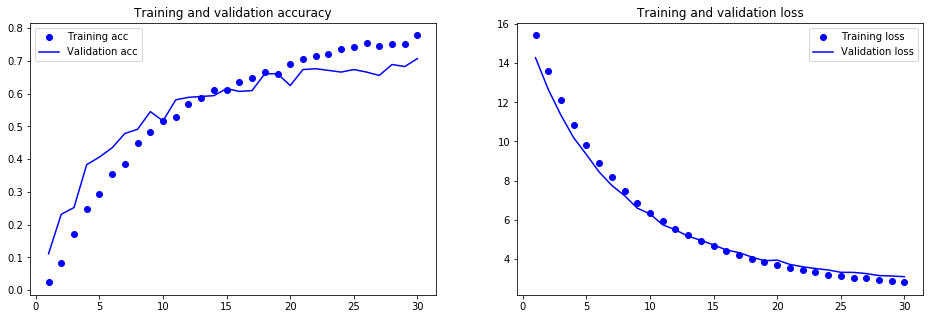

In [43]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


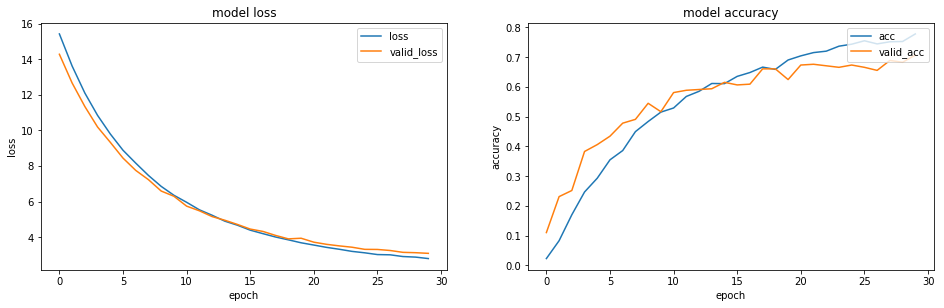

In [44]:
# PLOTTING

import matplotlib.pyplot as plt
%matplotlib inline

history = history2

# list all data in history
print(history.history.keys())

# close pre existing matplotlib visu
plt.close('all')

# summarize history for accuracy
plt.figure(figsize=(16, 10))

# summarize history for loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'valid_loss'], loc='upper right')
plt.title('model loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='valid_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'valid_acc'], loc='upper right')
plt.title('model accuracy')

#plt.subplot(2, 2, 3)
#plt.plot(history.history['lr'], label='learning rate')
#plt.title('learning rate')
# plt.ylabel('lr')
# plt.xlabel('epoch')
# plt.legend()

plt.savefig('model2_accuracy_epochs_' + jobNameTL + '.png')

# plt.subplots_adjust(wspace=0.50)
plt.show()

### Display Accuracy for transfer learning

In [46]:
# evaluate accuracy on fish species for each image in test set
scoreTL = model2.evaluate(test_tensors, test_targets, verbose=0)
accuracyTL = 100*scoreTL[1]

# print test accuracy
print('Test accuracy for Transfer Learning: %.4f%%' % accuracyTL)

Test accuracy for Transfer Learning: 73.5849%


In [47]:
# make predictions on the testing set then compute the rank-1 and rank-5 accuracies

from utils.ranked import rank5_accuracy

print("calculate predictions on test features for Transfer learning:")
preds = model2.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(preds, test_targets.argmax(axis=1))

# display the rank-1, rank-5 and rank-10 accuracies
print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

calculate predictions on test features for Transfer learning:
rank-1: 73.58%
rank-5: 88.21%
rank-10: 91.98%


In [48]:
from utils.fishdetector import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


fish unique-species detector give: ('cephalopholis_miniata', '88.98%') 

fish multi-species detector give:
0: ['cephalopholis_miniata', 'epinephelus_ongus', 'cephalopholis_cyanostigma']
1: [88.978455   1.1601691  1.0890337]


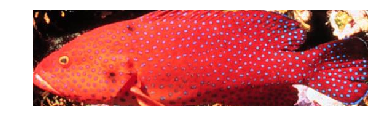

In [49]:
image_to_test = 'cephalopholis_miniata_7.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('aluterus_scriptus', '38.04%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'carangoides_fulvoguttatus', 'aluterus_monoceros']
1: [38.043762   9.863002   3.1765838]


fish unique-species detector give: ('aluterus_scriptus', '54.11%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'pseudalutarius_nasicornis', 'aluterus_monoceros']
1: [54.11398    3.1876802  2.4092472]


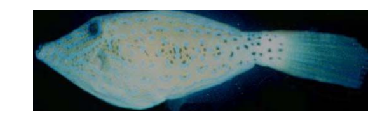

In [50]:
image_to_test = 'aluterus_scriptus_7.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('oxymonacanthus_longirostris', '92.28%') 

fish multi-species detector give:
0: ['oxymonacanthus_longirostris', 'hologymnosus_doliatus', 'halichoeres_hortulanus']
1: [92.27598    0.6392197  0.6100913]


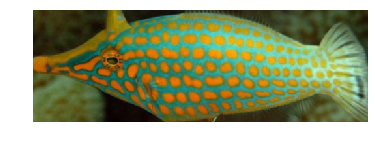

In [51]:
image_to_test = 'oxymonacanthus_longirostris_5.png'
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_purpureum', '36.49%') 

fish multi-species detector give:
0: ['thalassoma_purpureum', 'thalassoma_lutescens', 'thalassoma_trilobatum']
1: [36.48814  25.370783 12.234237]


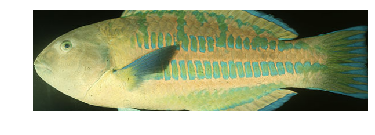

In [52]:
image_to_test = 'thalassoma_trilobatum_4.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_quinquevittatum', '20.94%') 

fish multi-species detector give:
0: ['thalassoma_quinquevittatum', 'thalassoma_lutescens', 'thalassoma_lunare']
1: [20.944122   6.953349   6.3648624]


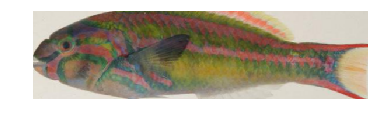

In [53]:
image_to_test = 'thalassoma_quinquevittatum_8.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_purpureum', '62.06%') 

fish multi-species detector give:
0: ['thalassoma_purpureum', 'thalassoma_trilobatum', 'thalassoma_lutescens']
1: [62.061405   9.124971   4.4897556]


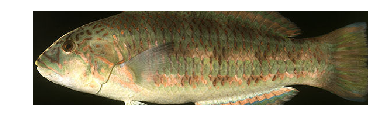

In [54]:
image_to_test = 'thalassoma_purpureum_6.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('thalassoma_hardwicke', '63.34%') 

fish multi-species detector give:
0: ['thalassoma_hardwicke', 'thalassoma_quinquevittatum', 'thalassoma_purpureum']
1: [63.343136   5.5309033  2.0393417]


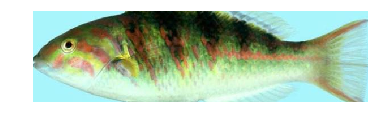

In [55]:
image_to_test = 'thalassoma_hardwicke_2.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('aluterus_scriptus', '7.33%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'oxymonacanthus_longirostris', 'sphyraena_obtusata']
1: [7.327398  3.300513  3.1272953]


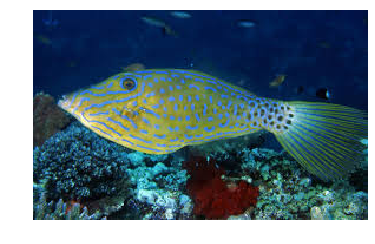

In [56]:
# FROM GOOGLE IMAGE https://www.google.com/imgres?imgurl=http%3A%2F%2Fwww.ryanphotographic.com%2Fimages%2FJPEGS%2FAluterus%2520scriptus%2520Scrawled%2520filefish%2C%2520Fiji.jpg&imgrefurl=http%3A%2F%2Fwww.ryanphotographic.com%2Fmonacanthidae.htm&docid=TdVoCxU2AegwAM&tbnid=fMeyh8ZXMYs4nM%3A&vet=10ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhKKAkwCQ..i&w=1000&h=626&bih=953&biw=1855&q=aluterus_scriptus&ved=0ahUKEwiZlK2Hp4zgAhVOiRoKHWsFBTEQMwhKKAkwCQ&iact=mrc&uact=8

image_to_test = 'aluterus_scriptus_downloadGoogleImage.jpeg'
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('pseudanthias_bicolor', '84.83%') 

fish multi-species detector give:
0: ['pseudanthias_bicolor', 'P1ROZCtZ', 'pseudanthias_cooperi']
1: [84.8276     3.4495552  2.6134481]


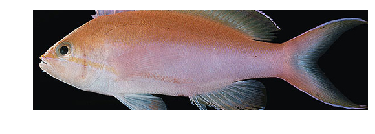

In [57]:
image_to_test = 'pseudanthias_bicolor_3.png'
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

In [58]:
# evaluate network head warmup
from sklearn.metrics import classification_report

predictions = model2.predict(test_tensors, batch_size=batch_size)
print(classification_report(test_targets.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=fish_names))

                               precision    recall  f1-score   support

                     P1ROZCtZ       1.00      1.00      1.00         1
         acanthistius_cinctus       0.00      0.00      0.00         1
          acanthopagrus_berda       1.00      1.00      1.00         1
           aethaloperca_rogaa       0.00      0.00      0.00         1
           aluterus_monoceros       0.00      0.00      0.00         1
            aluterus_scriptus       0.50      1.00      0.67         1
               amanses_scopas       1.00      1.00      1.00         1
   anampses_caeruleopunctatus       1.00      1.00      1.00         1
         anampses_meleagrides       1.00      1.00      1.00         1
             anampses_twistii       1.00      1.00      1.00         1
    anyperodon_leucogrammicus       0.00      0.00      0.00         1
               aphareus_furca       0.00      0.00      0.00         1
            aphareus_rutilans       1.00      1.00      1.00         1
     

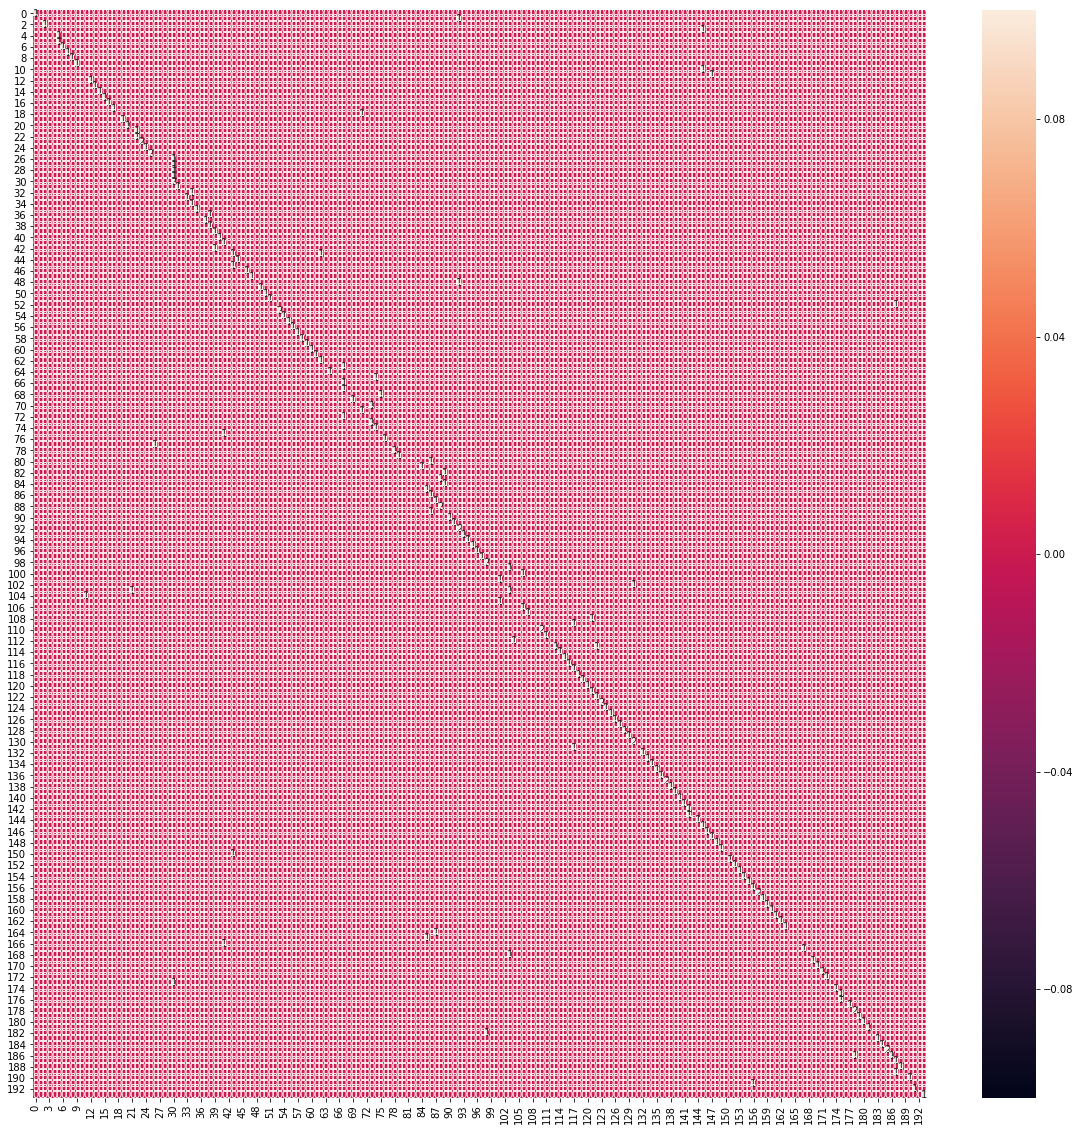

In [59]:
# During the presentation, M. Bertrand Forest ask me to add a confusion matrix for best overview. Here it is.  

from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(confusion_matrix(test_targets.argmax(axis=1), predictions.argmax(axis=1)),
                 annot=True, fmt='.5g', robust=True)
# print(cm)

---
<a id='step3'></a>
## Step 3: TRANSFER LEARNING FROM VGG16 with FINE TUNING

## Unfreeze some last layers from the base network : example > last convolutional block 

In [60]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    # deft: block4_conv1 ; if layer.name == 'block4_conv1':
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

#  DON'T FORGET to COMPILE MODEL AGAIN AFTER SET LAYER NOT TRAINABLE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [61]:
# Feature extraction with data augmentation and Fine-Tuning

# ------------------------------------------------------------------------------------------------
# job and Tensorboard hyperparameter setup
epochs = 250
batch_size = 8
lr = 1e-6 #5e-4  # deft 1e-4, 1e-5, 5e-5, 1e-6; top 5e-6 with block_conv5 only then 5e-4 for block_conv4
optim3 = SGD(lr=lr, momentum=0.9)         # best 0.0001 vgg16   # my default 2e-5 then 0.001
optimSt = 'SGD'
dataAugm = 'True'
splitInit = '_80_10_10'     # _80_10_10, _65_15_15
networkName = 'VGG16'  # 'VGG16', Xception, NASNet, MobileNet
batchNorm = 'False'
freezed = 'conv5'

In [62]:
# ------------------------------------------------------------------------------------------------------
# Writer tensorboard

jobNameTL_FT = 'fishTransLearnFT_Cropped_{}_network{}_btchSz{}_nEpch{}_lr{}_optim{}_dataAugm{}_batchNorm{}_splitInit{}_freeze{}'.format(
    time.strftime("%Y%m%d_%H%M%S"), networkName, batch_size, epochs, lr, optimSt, dataAugm, batchNorm, splitInit, freezed)

tensorboard_TL_FT = os.path.join('runs', jobNameTL_FT)
# ------------------------------------------------------------------------------------------------------
print('\n launch tensorboard --runs={0}` to visualize results on tensorboard \n'.format(tensorboard_TL_FT))
# ------------------------------------------------------------------------------------------------------
# callbacks TL

checkpointer_TL_FT = ModelCheckpoint(monitor='val_acc', filepath='saved_models/weights_best_from_'+jobNameTL_FT+'.hdf5',
                                     verbose=1, save_best_only=True)

# add tensorboard callback
tb_callback_TL_FT = keras.callbacks.TensorBoard(log_dir=tensorboard_TL)

# add Earlystop callback
earlystopping_TL_FT = EarlyStopping(monitor='val_acc', min_delta=0, patience=50,
                                    verbose=1, mode='auto', restore_best_weights=True)

# callback ReduceLROnPlateau
reduce_lr_TL_FT = ReduceLROnPlateau(
    monitor='val_acc', factor=0.75, patience=4, verbose=1)  # f=0.80 deft p=10 f=0.5

# ------------------------------------------------------------------------------------------------------
# compile the model (! After trainable layer changed and hyperparameter changed (lr, optimizer))
model2.compile(loss='categorical_crossentropy',
               optimizer=optim3, metrics=['accuracy'])

# training
history3 = model2.fit_generator(
    train_generator,
    steps_per_epoch=train_tensors.shape[0] // batch_size,
    epochs=epochs,
    callbacks=[checkpointer_TL_FT, tb_callback_TL_FT,
               earlystopping_TL_FT, reduce_lr_TL_FT],
    validation_data=validation_generator,
    validation_steps=valid_tensors.shape[0] // batch_size)



 launch tensorboard --runs=runs/fishTransLearnFT_Cropped_20190702_003528_networkVGG16_btchSz8_nEpch250_lr1e-06_optimSGD_dataAugmTrue_batchNormFalse_splitInit_80_10_10_freezeconv5` to visualize results on tensorboard 

Epoch 1/250
265/265 [==============================] - 116s 439ms/step - loss: 2.5646 - acc: 0.8127 - val_loss: 2.8419 - val_acc: 0.7031

Epoch 00001: val_acc improved from -inf to 0.70308, saving model to saved_models/weights_best_from_fishTransLearnFT_Cropped_20190702_003528_networkVGG16_btchSz8_nEpch250_lr1e-06_optimSGD_dataAugmTrue_batchNormFalse_splitInit_80_10_10_freezeconv5.hdf5
Epoch 2/250
265/265 [==============================] - 111s 419ms/step - loss: 2.3886 - acc: 0.8336 - val_loss: 2.7633 - val_acc: 0.6892

Epoch 00002: val_acc did not improve from 0.70308
Epoch 3/250
265/265 [==============================] - 112s 422ms/step - loss: 2.3079 - acc: 0.8349 - val_loss: 2.6920 - val_acc: 0.6928

Epoch 00003: val_acc did not improve from 0.70308
Epoch 4/250
265/

265/265 [==============================] - 112s 424ms/step - loss: 2.0206 - acc: 0.8626 - val_loss: 2.5157 - val_acc: 0.7012

Epoch 00037: val_acc did not improve from 0.70887
Epoch 38/250
265/265 [==============================] - 111s 418ms/step - loss: 2.0093 - acc: 0.8700 - val_loss: 2.4973 - val_acc: 0.7050

Epoch 00038: val_acc did not improve from 0.70887
Epoch 39/250
265/265 [==============================] - 111s 418ms/step - loss: 2.0010 - acc: 0.8683 - val_loss: 2.5152 - val_acc: 0.7031

Epoch 00039: val_acc did not improve from 0.70887
Epoch 40/250
265/265 [==============================] - 112s 423ms/step - loss: 2.0167 - acc: 0.8629 - val_loss: 2.4996 - val_acc: 0.7044

Epoch 00040: val_acc did not improve from 0.70887

Epoch 00040: ReduceLROnPlateau reducing learning rate to 7.508469046513255e-08.
Epoch 41/250
265/265 [==============================] - 112s 421ms/step - loss: 2.0025 - acc: 0.8656 - val_loss: 2.5091 - val_acc: 0.6999

Epoch 00041: val_acc did not improve 

265/265 [==============================] - 112s 422ms/step - loss: 1.9983 - acc: 0.8667 - val_loss: 2.4905 - val_acc: 0.7069

Epoch 00075: val_acc did not improve from 0.71015
Epoch 76/250
265/265 [==============================] - 111s 417ms/step - loss: 1.9900 - acc: 0.8702 - val_loss: 2.5040 - val_acc: 0.7024

Epoch 00076: val_acc did not improve from 0.71015
Epoch 77/250
265/265 [==============================] - 111s 420ms/step - loss: 1.9930 - acc: 0.8635 - val_loss: 2.5074 - val_acc: 0.6992

Epoch 00077: val_acc did not improve from 0.71015

Epoch 00077: ReduceLROnPlateau reducing learning rate to 5.637708966332866e-09.
Epoch 78/250
265/265 [==============================] - 112s 421ms/step - loss: 1.9956 - acc: 0.8618 - val_loss: 2.4931 - val_acc: 0.7076

Epoch 00078: val_acc did not improve from 0.71015
Epoch 79/250
265/265 [==============================] - 112s 421ms/step - loss: 1.9955 - acc: 0.8674 - val_loss: 2.5052 - val_acc: 0.7006

Epoch 00079: val_acc did not improve 

265/265 [==============================] - 111s 419ms/step - loss: 1.9976 - acc: 0.8670 - val_loss: 2.4904 - val_acc: 0.7069

Epoch 00113: val_acc did not improve from 0.71080
Epoch 114/250
265/265 [==============================] - 111s 418ms/step - loss: 1.9988 - acc: 0.8681 - val_loss: 2.4982 - val_acc: 0.7050

Epoch 00114: val_acc did not improve from 0.71080
Epoch 115/250
265/265 [==============================] - 112s 422ms/step - loss: 1.9922 - acc: 0.8664 - val_loss: 2.4973 - val_acc: 0.7018

Epoch 00115: val_acc did not improve from 0.71080
Epoch 116/250
265/265 [==============================] - 111s 420ms/step - loss: 1.9916 - acc: 0.8695 - val_loss: 2.5136 - val_acc: 0.7050

Epoch 00116: val_acc did not improve from 0.71080

Epoch 00116: ReduceLROnPlateau reducing learning rate to 4.233056405400504e-10.
Epoch 117/250
265/265 [==============================] - 114s 428ms/step - loss: 1.9961 - acc: 0.8715 - val_loss: 2.4936 - val_acc: 0.7018

Epoch 00117: val_acc did not impr

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


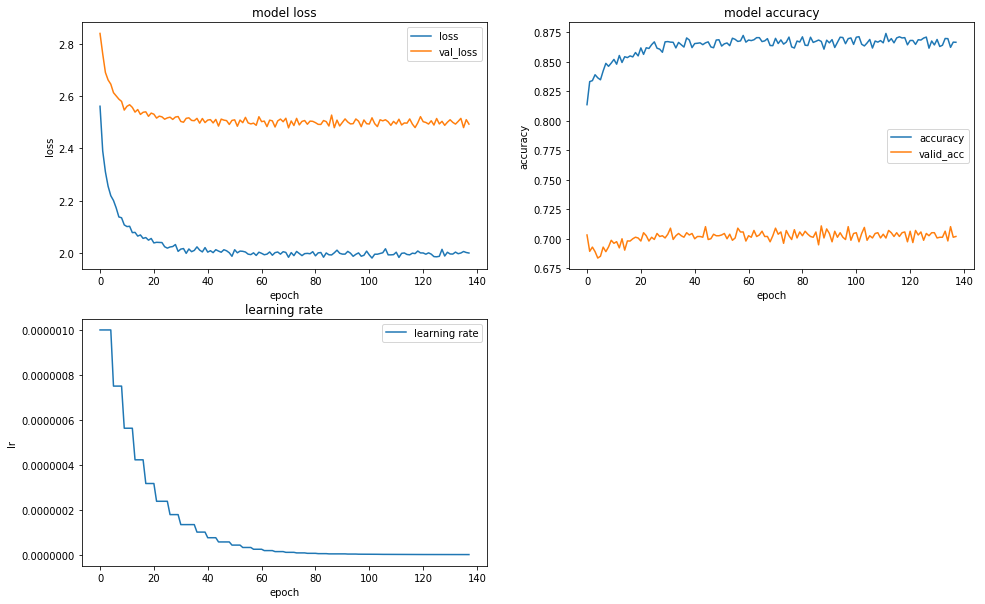

In [63]:
# Plotting Training

import matplotlib.pyplot as plt
history = history3

%matplotlib inline

# list all data in history
print(history.history.keys())

# close pre existing matplotlib visu
plt.close('all')

# summarize history for accuracy
plt.figure(figsize=(16, 10))

# summarize history for loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.title('model loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='valid_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title('model accuracy')

plt.subplot(2, 2, 3)
plt.plot(history.history['lr'], label='learning rate')
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend()
# plt.subplots_adjust(wspace=0.50)
plt.show()

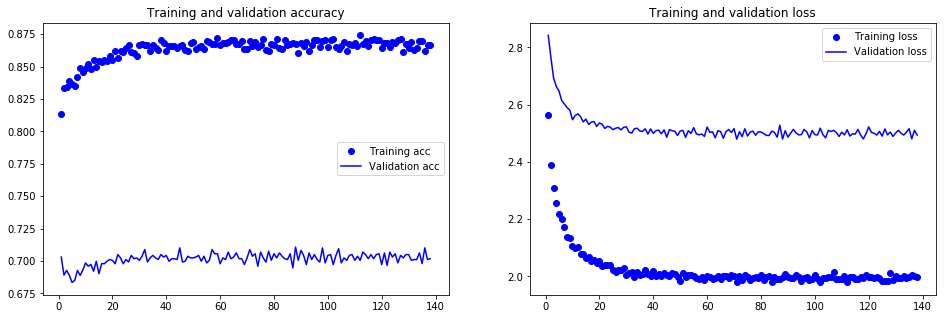

In [64]:
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test accuracy on test set

In [65]:
# evaluate test accuracy
scoreTLFT = model2.evaluate(test_tensors, test_targets, verbose=0)
accuracyTLFT = 100*scoreTLFT[1]

# print test accuracy
print('Test accuracy for Transfer Learning with Fine Tuning: %.2f%%' % accuracyTLFT)

Test accuracy for Transfer Learning with Fine Tuning: 72.64%


### Rank-1, Rank-5 and Rank-10 accuracy 

In [66]:
# make predictions on the testing set then compute the rank-1, rank-5 and rank-10 accuracies

from utils.ranked import rank5_accuracy

print("calculate predictions on test features for Transfer Learning witg Fine Tuning model:")
preds = model2.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(preds, test_targets.argmax(axis=1))

# display the rank-1, rank-5 and rank-10 accuracies
print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

calculate predictions on test features for Transfer Learning witg Fine Tuning model:
rank-1: 72.64%
rank-5: 88.68%
rank-10: 93.87%


### Classification report

In [67]:
# evaluate network head warmup
from sklearn.metrics import classification_report

predictions = model2.predict(test_tensors, batch_size=batch_size)
print(classification_report(test_targets.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=fish_names))

                               precision    recall  f1-score   support

                     P1ROZCtZ       1.00      1.00      1.00         1
         acanthistius_cinctus       0.00      0.00      0.00         1
          acanthopagrus_berda       1.00      1.00      1.00         1
           aethaloperca_rogaa       0.00      0.00      0.00         1
           aluterus_monoceros       0.00      0.00      0.00         1
            aluterus_scriptus       0.50      1.00      0.67         1
               amanses_scopas       0.00      0.00      0.00         1
   anampses_caeruleopunctatus       0.50      1.00      0.67         1
         anampses_meleagrides       1.00      1.00      1.00         1
             anampses_twistii       1.00      1.00      1.00         1
    anyperodon_leucogrammicus       0.00      0.00      0.00         1
               aphareus_furca       0.00      0.00      0.00         1
            aphareus_rutilans       1.00      1.00      1.00         1
     

/home/jmp/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jmp/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jmp/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---
<a id='step4'></a>
## Step 4: Outro Rank-1, Rank5 and Rank-10

In [68]:
print("calculate predictions on test features for Scratch learning model:")
preds = model.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(
    preds, test_targets.argmax(axis=1))

# display the rank-1, rank-5 and rank-10 accuracies
print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

print("calculate predictions on test features for Transfer Learning:")
preds = model2.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(
    preds, test_targets.argmax(axis=1))

print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

print("calculate predictions on test features for Transfer Learning with Fine Tuning model:")
preds = model2.predict_proba(test_tensors)
(rank1, rank5, rank10) = rank5_accuracy(
    preds, test_targets.argmax(axis=1))

print("rank-1: {:.2f}%".format(rank1 * 100))
print("rank-5: {:.2f}%".format(rank5 * 100))
print("rank-10: {:.2f}%".format(rank10 * 100))

### be carefull: transfer learning step (step 3) doesn't store the bottlelneck so model 2 and 3 (==Fine Tuning) 
# will be the same below 
# please display acuracy after step 2 and compare it then with step 3

calculate predictions on test features for Scratch learning model:
rank-1: 38.21%
rank-5: 63.68%
rank-10: 71.23%
calculate predictions on test features for Transfer Learning:
rank-1: 72.64%
rank-5: 88.68%
rank-10: 93.87%
calculate predictions on test features for Transfer Learning with Fine Tuning model:
rank-1: 72.64%
rank-5: 88.68%
rank-10: 93.87%


## PAPERS RESULTS

screenshot from paper results


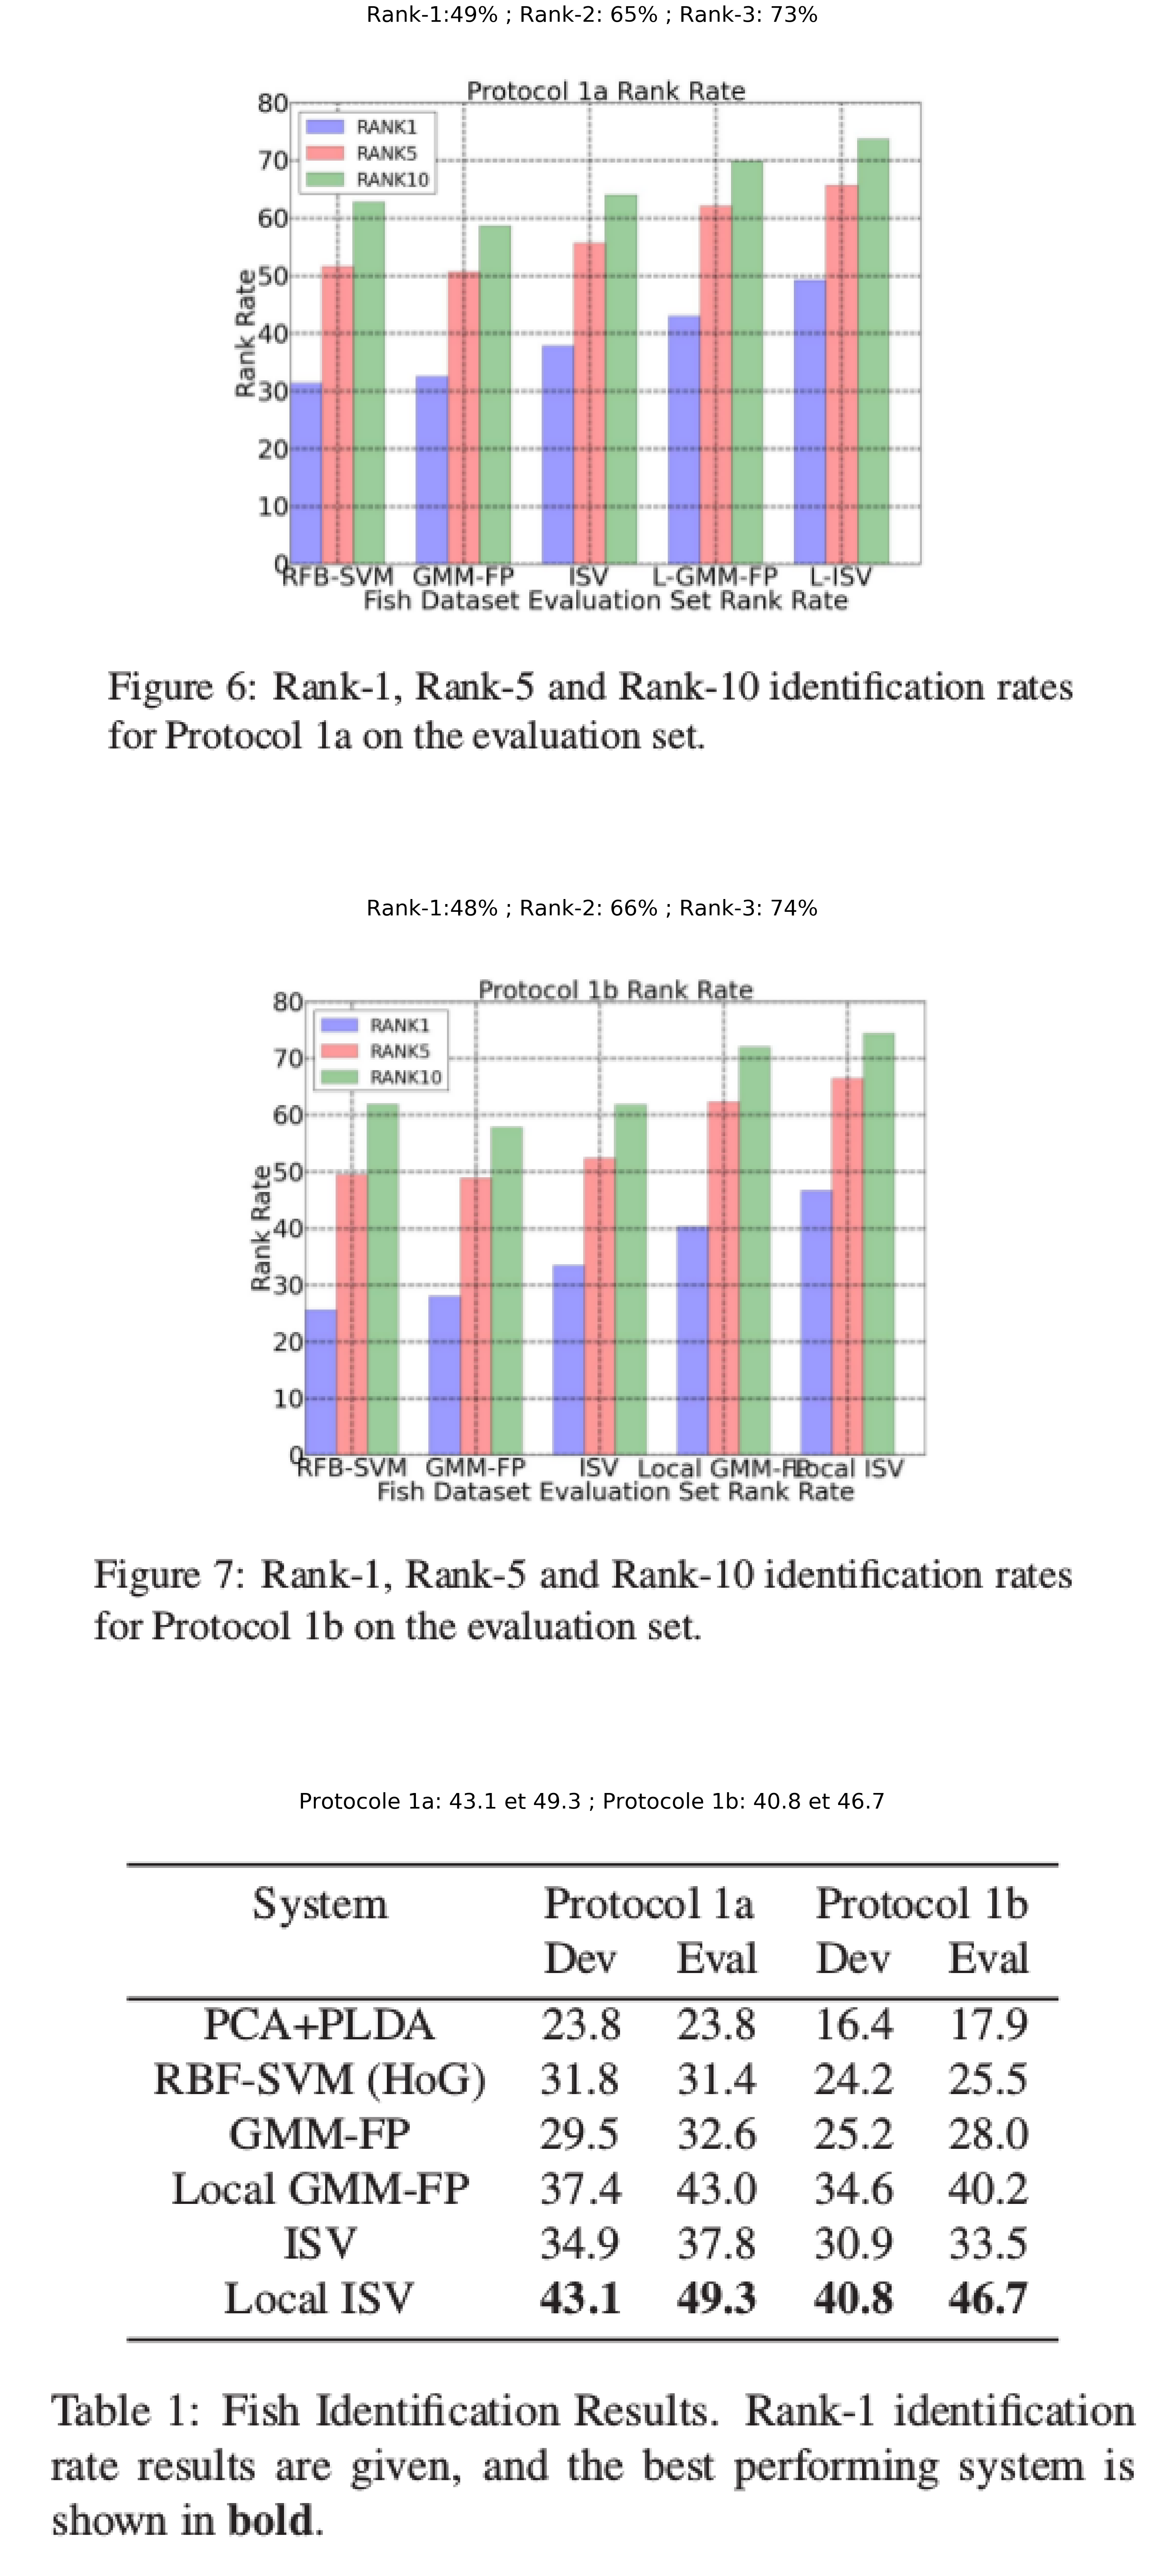

In [69]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def display_image(img_path):
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.axis('off')


# close pre existing matplotlib visu
plt.close('all')

print('screenshot from paper results')

# summarize history for accuracy
plt.figure(figsize=(60, 60))

plt.subplot(3, 1, 1)
plt.title('Rank-1:49% ; Rank-2: 65% ; Rank-3: 73%', fontsize=28)
display_image('Screenshot from 2019-01-28 10-06-00.png')

plt.subplot(3, 1, 2)
plt.title('Rank-1:48% ; Rank-2: 66% ; Rank-3: 74%', fontsize=28)
display_image('Screenshot from 2019-01-28 10-05-39.png')

plt.subplot(3, 1, 3)
plt.title('Protocole 1a: 43.1 et 49.3 ; Protocole 1b: 40.8 et 46.7', fontsize=28)
display_image('Screenshot from 2019-01-28 10-07-25.png')

fish unique-species detector give: ('cephalopholis_miniata', '99.79%') 

fish multi-species detector give:
0: ['cephalopholis_miniata', 'cephalopholis_argus', 'cephalopholis_cyanostigma']
1: [9.9790634e+01 6.9243714e-02 4.3429621e-02]


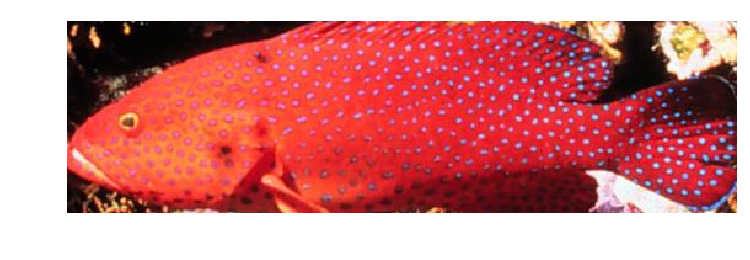

In [70]:
image_to_test = 'cephalopholis_miniata_7.png'

specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('aluterus_scriptus', '38.04%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'carangoides_fulvoguttatus', 'aluterus_monoceros']
1: [38.043762   9.863002   3.1765838]


fish unique-species detector give: ('aluterus_scriptus', '98.53%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'cantherhines_fronticinctus', 'pseudalutarius_nasicornis']
1: [98.52932     0.30487725  0.24812208]


fish unique-species detector give: ('aluterus_scriptus', '98.53%') 

fish multi-species detector give:
0: ['aluterus_scriptus', 'cantherhines_fronticinctus', 'pseudalutarius_nasicornis']
1: [98.52932     0.30487725  0.24812208]


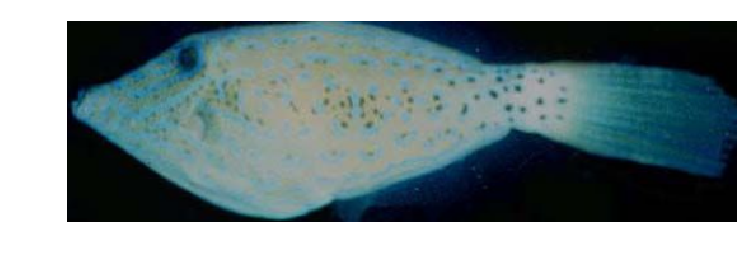

In [71]:
image_to_test = 'aluterus_scriptus_7.png'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('bothus_pantherinus', '33.54%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'macolor_niger', 'aethaloperca_rogaa']
1: [33.542164   5.3573446  5.3001328]


fish unique-species detector give: ('bothus_pantherinus', '44.71%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'bothus_mancus', 'epinephelus_coeruleopunctatus']
1: [44.712463  14.047061   5.4348245]


fish unique-species detector give: ('bothus_pantherinus', '44.71%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'bothus_mancus', 'epinephelus_coeruleopunctatus']
1: [44.712463  14.047061   5.4348245]


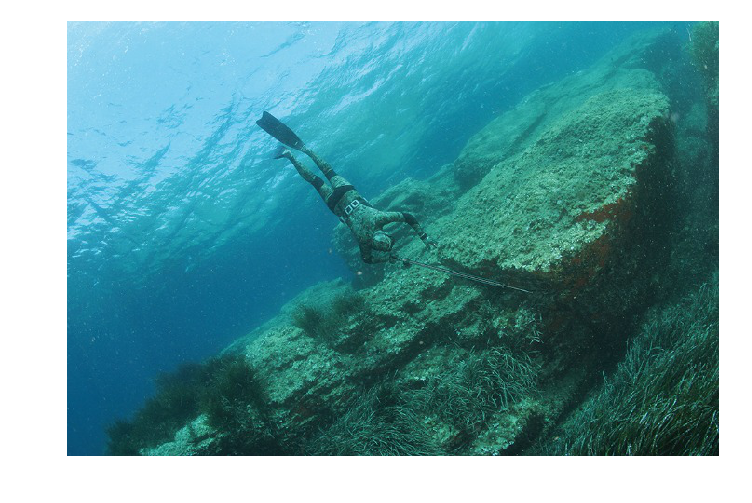

In [72]:
# one person ask during presentation what is the score if there is no fish on photo but something like, 
# for example, a diver. Here is the answer. 
image_to_test = 'only_fond.jpg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

fish unique-species detector give: ('cantherhines_dumerilii', '8.45%') 

fish multi-species detector give:
0: ['cantherhines_dumerilii', 'amanses_scopas', 'bothus_pantherinus']
1: [8.453988 7.103946 5.531949]


fish unique-species detector give: ('bothus_pantherinus', '7.86%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'aphareus_furca', 'aphareus_rutilans']
1: [7.8638062 5.873509  5.573055 ]


fish unique-species detector give: ('bothus_pantherinus', '7.86%') 

fish multi-species detector give:
0: ['bothus_pantherinus', 'aphareus_furca', 'aphareus_rutilans']
1: [7.8638062 5.873509  5.573055 ]


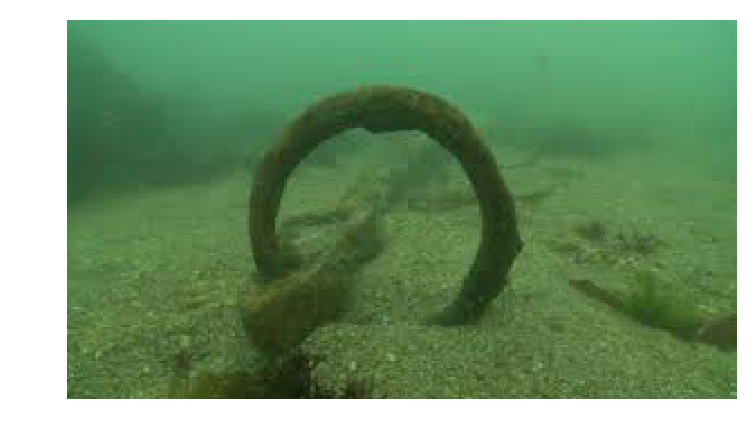

In [73]:
# During the presentation, one person ask me what is the result without fish. Here it is.  

# Image from google
image_to_test = 'only_fond2.jpeg'

specie_identification(model, image_to_test, fish_names)
multiples_species_identification(model, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)
print('\n')
specie_identification(model2, image_to_test, fish_names)
multiples_species_identification(model2, image_to_test, fish_names)

In [74]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import Image

fdir = 'fishImages_opt_crop/pre_set experiment with numbers/all_images/'


@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('84.png', '945.png', '1349.png', '4237.png', '4259…

### My final comments: 
This fish dataset used is super small and using deep learning here was a great challenge. 

For dailly use, transfer learning is the first way to go. Then, when practionner will be use to DL algorithm behavior, making own models is a nice exercise. 

In general use, 50 images is more than recommanded to avoid overfitting and good generalisation. 
The less the number of sample is, the most difficult is the neural network to tune. 

For complete newbies in DL, 250 samples per class is a good number in general.

For learning purpose, some values has been set too high to show what callbacks do in general(too high learning rate for example for step 1 'scratch' show effect of reduce on plateau callbacks).

Kind Regards and Good Luck in the awesome Deep Learning course path.

Jean-Marie Prigent


### please contact me if any questions or comments > [Jean-Marie Prigent](https://www.linkedin.com/in/jmprigent/)